Cette première session de NLP va vous donner les bases de la manipulation de texte en vue du data challenge qui vous attend après l'été !

In [ ]:
!pip install spacy
!python -m spacy download fr_core_news_md

In [1]:
import spacy

# Preprocessing avec spacy

## Chargement de la librairie

- Importer la classe `French` de `spacy.lang.fr`
- Créer l'objet `nlp` avec le constructeur de la classe `French`
- Créer un `doc` et afficher son texte.

In [2]:
# Importez la classe de langage French
from spacy.lang.fr import French

# Créez l'objet nlp
nlp = French()

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(doc.text)

Ceci est une phrase narcissique puisqu'elle ne parle que d'elle-même.


**L'objet NLP**

- contient le 'pipeline' des calculs
- inclut des règles spécifiques au langage pour la tokenization, etc.

**L'objet doc**

Contient un document, c'est-à-dire un ensemble de *tokens*.

### Manipulation d'un objet `Doc`

L'objet `Doc`se manipule comme une liste. 

A l'aide des `[]`:
- Accedez au premier token de doc
- Selectionnez les mots `'est une'` dans une slice
- Selectionnez les mots entre `'est une phrase narcissique'` dans une slice

In [3]:
# A slice of the Doc for 'est une'
est_une = doc[1:3]
print(est_une.text)

# A slice of the Doc for 'est une phrase narcissique'
est_une_phrase_narcissique = doc[1:5]
print(est_une_phrase_narcissique.text)

est une
est une phrase narcissique


### Tokenisation

In [4]:
# Tokenization de mots
from spacy.lang.fr import French

# Charger English tokenizer, tagger, parser, NER and word vectors
nlp = French()

text = """L'apprentissage de la data science requiert de ne pas se décourager.
Les défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!"""

#  "nlp" Object est utilisé pour créer des documents avec des annotations linguistiques
my_doc = nlp(text)

# Créer la liste des tokens de mots
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

["L'", 'apprentissage', 'de', 'la', 'data', 'science', 'requiert', 'de', 'ne', 'pas', 'se', 'décourager', '.', '\n', 'Les', 'défis', 'et', 'les', 'revers', 'ne', 'sont', 'pas', 'des', 'échecs', ',', 'ils', 'font', 'simplement', 'partie', 'du', 'voyage', '!']


In [5]:
# Tokenization de phrases

# Charger English tokenizer, tagger, parser, NER and word vectors
nlp = French()

# Créer le composant 'sentencizer' du pipeline
sbd = nlp.create_pipe('sentencizer')

# Ajouter le composant au pipeline
nlp.add_pipe(sbd)

text = """L'apprentissage de la data science requiert de ne pas se décourager.
Les défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!"""
#  L'objet "nlp" est utilisé pour créer un document avec des annotations linguistiques
doc = nlp(text)

# Créaer une liste de tokens de phrases
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

["L'apprentissage de la data science requiert de ne pas se décourager.", '\nLes défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!']


#### Exercice

Dans cet exemple, vous allez utiliser les objets `Doc` et `Token` de spaCy, et des attributs lexicaux pour identifier des pourcentages dans un texte. Vous devez chercher deux tokens qui se suivent: un nombre et un signe pourcentage.

- Utiliser l'attribut de token `like_num` pour voir si le token dans le document ressemble à un nombre.
- Lire le token qui suit immédiatement ce token. L'index du token suivant dans le `doc` est `token.i + 1`.
- Regarder si l'attribut `text` du token suivant est un signe `”%“`.

In [6]:
from spacy.lang.fr import French

nlp = French()

# Process the text
doc = nlp(
    "En 1990, plus de 60% de la population d'Asie orientale vivait dans l'extrême pauvreté. "
    "Cela représente désormais moins de 4%."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Pourcentage trouvé:", token.text)

Pourcentage trouvé: 60
Pourcentage trouvé: 4


### Suppression des stop words

In [7]:
from spacy.lang.fr.stop_words import STOP_WORDS

# print(list(STOP_WORDS)[:10])

In [8]:
#Implémentation des stop words:
filtered_sent=[]

#  L'objet "nlp" est utilisé pour créer des documents avec annotations
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop or word.is_punct ==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [L', apprentissage, de, la, data, science, requiert, de, ne, pas, se, décourager, 
, Les, défis, et, les, revers, ne, sont, pas, des, échecs, ils, font, simplement, partie, du, voyage]


In [9]:
doc = nlp(text)
tokens = [token for token in doc if not token.text in STOP_WORDS and not token.is_punct]
print(tokens)

[L', apprentissage, data, science, requiert, décourager, 
, Les, défis, revers, échecs, simplement, partie, voyage]


### Lemmatisation

In [12]:
# Implémenter la lemmatization
lem = nlp("électrique électricité électrifier électrification")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

électrique électrique
électricité électricité
électrifier électrifier
électrification électrification


### Etiquetage morpho-synthaxique (POS tags)

**Que sont les modèles statistiques ?**

- Ils permettent à spaCy de prédir les attributs linguistiques dans un contexte
    - Tags Part-of-speech (POS)
    - Dépendances syntaxiques
    - Entités nommées
- Ils sont entraînés sur des textes labellisés
- Ils peuvent être mis à jour avec des exemples additionnels

In [13]:
from spacy import displacy
import fr_core_news_md

nlp = fr_core_news_md.load()

In [14]:
# Process a text
doc = nlp("Elle a mangé la pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

Elle PRON
a AUX
mangé VERB
la DET
pizza NOUN


In [15]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

displacy.render(doc, style="dep")

Elle PRON nsubj mangé
a AUX aux mangé
mangé VERB ROOT mangé
la DET det pizza
pizza NOUN obj mangé


### Détection d'entités

In [16]:
# Process a text
doc = nlp("Enedis cherche de nouveaux bureaux à Vaison-La-Romaine "
          "avec l'aide de François Cordel.")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)
    
displacy.render(doc, style="ent")

Enedis LOC
Vaison LOC
Romaine LOC
François Cordel PER


In [17]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [18]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

In [19]:
spacy.explain("PER")

'Named person or family.'

### Chunking : noun chunks

In [20]:
doc = nlp("Il est important pour les utilisateurs de véhicules électriques de disposer facilement "
          "d'infrastructures de recharge pratiques.")

for chunk in doc.noun_chunks:
    print("Groupe nominal :", chunk.text, "; Nom : ", chunk.root.text, "\n")

Groupe nominal : Il ; Nom :  Il 

Groupe nominal : de véhicules électriques ; Nom :  véhicules 

Groupe nominal : d'infrastructures de recharge pratiques ; Nom :  infrastructures 



# Nuage de mots

Nous allons scrapper la page wikipedia d'Enedis et créer un nuage de mots pour comprendre ce qu'il ressort de l'article. 

- Utilisez le code suivant pour charger la page

In [21]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Enedis")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = []
for p in soup.find_all("p"):
    corpus.append(p.text)

join_corpus = " ".join(corpus)
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
clean_corpus[:70]+"..."

'Enedis, anciennement ERDF (pour Électricité Réseau Distribution France...'

* Importez maintenant `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [22]:
# Import de Spacy et initialisation à Francais
import fr_core_news_sm
nlp = fr_core_news_sm.load()
print(nlp)

* Incorporez maintenant votre corpus complet dans spacy via `fr_core_news_sm.load()`

In [23]:
# Création d'une variable doc contenant les textes du corpus
doc = nlp(clean_corpus)

- Installez la librairie wordcloud

In [ ]:
!pip install wordcloud

* Avec la librairie `wordcloud`, créez un premier nuage de mots 

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Importez maintenant les stop-words présents dans `spacy`

In [25]:
# Import des Stop words
from spacy.lang.fr.stop_words import STOP_WORDS

* Faites à nouveau un nuage de mots sans les stop words

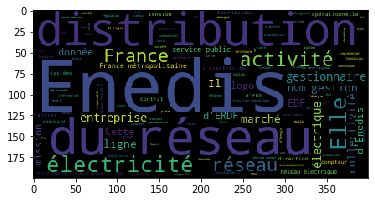

In [26]:
wd = WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Enfin nous aurions besoin d'avoir un corpus de mots lemmatisés, recréez un corpus de mots lemmatisés et visualisez votre nouveau nuage de mots

In [28]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]

In [29]:
corpus_lemma = " ".join(lemma)

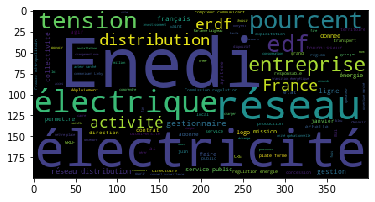

In [30]:
wd = WordCloud()
cloud = wd.generate(corpus_lemma)
plt.imshow(cloud)

# Classification de texte

In [ ]:
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

## Traitement

In [ ]:
!python -m spacy download fr

In [32]:
import string
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French

# Création de la liste de signes de ponctuation
punctuations = string.punctuation
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Charger English tokenizer, tagger, parser, NER and word vectors
parser = French()

# Création de la fonction de tokenization
def spacy_tokenizer(sentence):
    # Création du token, utilisé pour créer des documents avec des annotations linguistiques
    mytokens = parser(sentence)

    # Lemmatisation de chaque token et conversion en caractères minuscules
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Suppression des stop words
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations ]

    # On retourne la liste des tokens préparés
    return mytokens

In [33]:
# Transformer personnalisé grâce à spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Nettoyage du texte
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Fonction basique pour nettoyer le texte
def clean_text(text):
    # Suppression des espaces et conversion des caractères en minuscules
    return text.strip().lower()

In [34]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [35]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [37]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('restaurants.csv')

X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_2'] # les labels, ou réponses, pour lesquels on veut tester notre modèle

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Création du pipeline en utilisant des Bag of Words
pipe = Pipeline([('cleaner', predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# Génération du modèle
pipe.fit(X_train,y_train)

In [39]:
from sklearn import metrics
# Predicting avec un dataset de test
predicted = pipe.predict(X_test)

# Précision du modèle
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("\nLogistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Logistic Regression Precision and Recall:",metrics.precision_score(y_test, predicted, average = None))
# print("Logistic Regression Precision and Recall:",metrics.recall_score(y_test, predicted, average = None))

Confusion matrix:
 [[47 12]
 [14 28]]

Logistic Regression Accuracy: 0.7425742574257426


In [40]:
y_test.values

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
predicted

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

**Remarque**

La qualité des données initiales a un rôle fondamental.

*Exemple*
- `' '.join(sentences)` --> 75% accuracy
- `'. '.join(sentences)` --> 80% accuracy

## T-SNE sur TF-IDF

In [ ]:
X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_3'] # les labels, ou réponses, pour lesquels on veut tester notre modèle
print(df.loc[:, ['texte','label_3']])

In [43]:
# On calcule le tf-idf pour chaque mot de chaque texte
tfidf = tfidf_vector.fit_transform(X)
print(tfidf[0])

  (0, 2664)	0.19063008837616918
  (0, 3343)	0.21525097924564815
  (0, 1123)	0.08252461529628193
  (0, 3178)	0.08963850701271413
  (0, 5)	0.1481499390456917
  (0, 2605)	0.2728012013802605
  (0, 1489)	0.17894083177627457
  (0, 887)	0.19762505956550655
  (0, 2410)	0.13235731037641854
  (0, 2849)	0.2844904579801551
  (0, 3349)	0.1625772495563816
  (0, 3006)	0.2086943743775177
  (0, 3013)	0.1928595512076241
  (0, 3339)	0.0670404338558784
  (0, 1011)	0.21886513423074527
  (0, 2364)	0.2844904579801551
  (0, 3332)	0.16142027955521124
  (0, 1317)	0.29956053078428996
  (0, 2787)	0.2632503833149164
  (0, 2972)	0.32080060544952865
  (0, 2312)	0.11432293272283538
  (0, 4)	0.06287917760868467
  (0, 2201)	0.2844904579801551
  (0, 2845)	0.10054001238163394


In [ ]:
# Affichage des résultats pour le prmeier commentaire

# Premier commentaire
print(df.loc[0, 'texte'])

# TF-IDF pour le premier commentaire
df_tfidf = pd.DataFrame(tfidf[0].T.todense(), index = tfidf_vector.get_feature_names(), columns=["tf_idf"])
df_tfidf.sort_values(by=["tf_idf"],ascending=False)

In [ ]:
# Création d'un dataframe regroupant les tf-idf et les labels
df_tfidf = pd.DataFrame(tfidf.todense(), columns = tfidf_vector.get_feature_names())
df_tfidf = pd.concat([df_tfidf, ylabels], axis=1)
print(df_tfidf)

In [46]:
# t-SNE sur les données
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_tfidf.drop(['label_3'], axis=1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 335 samples in 0.025s...
[t-SNE] Computed neighbors for 335 samples in 0.419s...
[t-SNE] Computed conditional probabilities for sample 335 / 335
[t-SNE] Mean sigma: 0.219746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.265221
[t-SNE] KL divergence after 300 iterations: 1.785932


In [ ]:
# On considère les deux dimensions les plus importantes
df_tfidf['Dim 1'] = tsne_results[:,0]
df_tfidf['Dim 2'] = tsne_results[:,1]

# On projette les données sur les deux axes, en colorant les points avec les labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "Dim 1", y = "Dim 2",
    hue = "label_3",
    palette = sns.color_palette("hls", 3),
    data = df_tfidf,
    legend = "full",
    alpha = 1.0
)